In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Feature Scaling Based on Variance

In [25]:
data = pd.read_csv("Data/archive/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
features = data.drop(['quality'],axis=1)
labels = data.filter(['quality'],axis=1)

In [27]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [28]:
features.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
dtype: float64

In [29]:
from sklearn.feature_selection import VarianceThreshold

var_Sel = VarianceThreshold(threshold=(0.1))
var_Sel.fit(features)

VarianceThreshold(threshold=0.1)

In [30]:
attributes_to_retain = features.columns[var_Sel.get_support()]
attributes_to_retain

Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')

In [31]:
attributes_to_filter = [attr for attr in features.columns if attr not in features.columns[var_Sel.get_support()]]
attributes_to_filter

['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates']

## Note
One of the main issues with variance-based feature selection is that it doesn’t take the relationship between mutual features into account while feature selection. Hence, with variance- based feature selection, redundant features may be selected.

# Feature Selection using Correlation

In feature selection based on correlation, the features are selected using the following steps: <br>
1. Mutual correlation between all the features is calculated. 
2. The correlation threshold is set. 
3. Features having mutual correlation greater than the correlation threshold with any other feature are removed from the dataset

In [32]:
correlation_matrix = features.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [33]:
correlation_matrix.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


<AxesSubplot:>

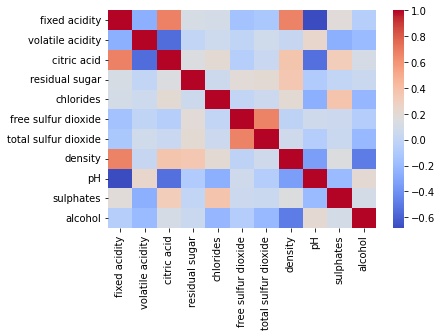

In [34]:
# another way to do same thing using seaborn
sns.heatmap(correlation_matrix,cmap='coolwarm')

In [35]:
correlated_feature_matrix = set()

for i in range(len(correlation_matrix)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.6:
            corr_col = correlation_matrix.columns[i]
            correlated_feature_matrix.add(corr_col)

In [36]:
len(correlated_feature_matrix)

4

In [37]:
correlated_feature_matrix

{'citric acid', 'density', 'pH', 'total sulfur dioxide'}

In [38]:
filtered_data = features.drop(correlated_feature_matrix,axis=1)
filtered_data.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol
0,7.4,0.70,1.9,0.076,11.0,0.56,9.4
1,7.8,0.88,2.6,0.098,25.0,0.68,9.8
2,7.8,0.76,2.3,0.092,15.0,0.65,9.8
3,11.2,0.28,1.9,0.075,17.0,0.58,9.8
4,7.4,0.70,1.9,0.076,11.0,0.56,9.4


# Feature Selection Based on Recursive Elimination
In recursive feature elimination (RFE), a machine learning model is trained to make predictions. The predictions are compared with actual labels, and the predictive power of each feature is calculated. The feature with the least predictive power is eliminated

The model is again trained, and in the second iteration, again, one feature with the least predictive power is eliminated. The process continues until a minimum number of features is achieved


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(estimator=lr,n_features_to_select=4,step=1)
rfe.fit(features,labels)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [42]:
rfe.ranking_

array([5, 1, 4, 6, 1, 7, 8, 1, 2, 1, 3])

In [43]:
attributes_to_retain = rfe.get_support(1)
attributes_to_retain

array([1, 4, 7, 9], dtype=int64)

In [44]:
filtered_data = features[features.columns[attributes_to_retain]]
filtered_data

,volatile acidity,chlorides,density,sulphates
0,0.700,0.076,0.99780,0.56
1,0.880,0.098,0.99680,0.68
2,0.760,0.092,0.99700,0.65
3,0.280,0.075,0.99800,0.58
4,0.700,0.076,0.99780,0.56
...,...,...,...,...
1594,0.600,0.090,0.99490,0.58
1595,0.550,0.062,0.99512,0.76
1596,0.510,0.076,0.99574,0.75
1597,0.645,0.075,0.99547,0.71



# 4. Selection Based on Model Performance

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(features,labels)

C:\Users\ENVY\AppData\Local\Temp\ipykernel_20688\1332110296.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(features,labels)


RandomForestRegressor()

In [46]:
model = SelectFromModel(rfr,prefit=True, threshold='mean')
X_transformed = model.transform(features)

c:\Users\ENVY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [47]:
cols = model.get_support(indices=True)
cols

array([ 1,  9, 10], dtype=int64)

In [49]:
attributes_to_retain = features[features.columns[cols]]
attributes_to_retain

,volatile acidity,sulphates,alcohol
0,0.700,0.56,9.4
1,0.880,0.68,9.8
2,0.760,0.65,9.8
3,0.280,0.58,9.8
4,0.700,0.56,9.4
...,...,...,...
1594,0.600,0.58,10.5
1595,0.550,0.76,11.2
1596,0.510,0.75,11.0
1597,0.645,0.71,10.2
